In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as md
import pyiso
from palettable.colorbrewer.qualitative import Dark2_8

from pyiso import client_factory
from datetime import date
import datetime
%matplotlib inline

In [2]:
caiso = client_factory('caiso')
generation = pd.DataFrame(caiso.get_generation(start_at=datetime.datetime(2018,9,9),end_at=datetime.datetime(2018,9,16)))
load = pd.DataFrame(caiso.get_load(start_at=datetime.datetime(2018,9,9,),end_at=datetime.datetime(2018,9,16)))

In [123]:
loads = []
load['timestamp'] = load.apply(lambda x: x.timestamp.tz_convert('US/Pacific'), axis=1)

for i in range(9,16):
    mask = (load['timestamp'] > pd.Timestamp('2018-9-'+str(i),tz = 'US/Pacific')) & (load['timestamp'] <= pd.Timestamp('2018-9-'+str(i+1),tz = 'US/Pacific'))
    loads.append(load.loc[mask])

In [124]:
generation['timestamp'] = generation.apply(lambda x: x.timestamp.tz_convert('US/Pacific'), axis=1)
gens = []
for i in range(9,16):
    mask = (generation['timestamp'] > pd.Timestamp('2018-9-'+str(i),tz = 'US/Pacific')) & (generation['timestamp'] <= pd.Timestamp('2018-9-'+str(i+1),tz = 'US/Pacific'))
    gens.append(generation.loc[mask])

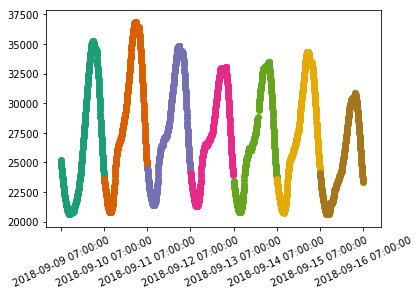

In [125]:
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
plt.xticks(rotation=25)
ax=plt.gca()
ax.set_prop_cycle('color', Dark2_8.mpl_colors)

ax.xaxis.set_major_formatter(xfmt)
for i in loads:
    ax.scatter(i['timestamp'].dt.to_pydatetime(),i['load_MW'])

plt.show()

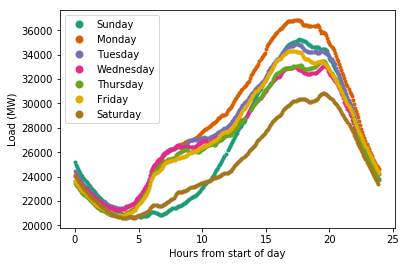

In [110]:
xfmt = md.DateFormatter('%Y-%m-%d %H:%M:%S')
plt.xticks(rotation=0)
ax=plt.gca()
ax.set_prop_cycle('color', Dark2_8.mpl_colors)

for i in loads:
    ax.plot((i['timestamp']-i['timestamp'].min())/np.timedelta64(1, 'h'),i['load_MW'],label= i['timestamp'].min().day_name(),marker='o',
        linewidth=0, markersize=4,markeredgewidth=0)

ax.set_xlabel('Hours from start of day')
ax.set_ylabel('Load (MW)')

lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10,markerscale=2)

plt.show()

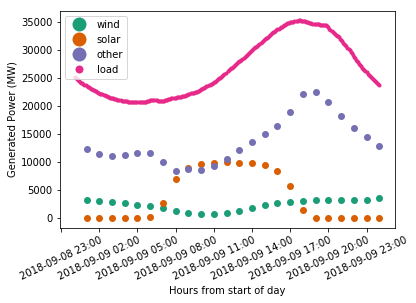

In [143]:
xfmt = md.DateFormatter('%Y-%m-%d %H:%M',tz=gens[0]['timestamp'][0].to_pydatetime().tzinfo)
plt.xticks(rotation=25)
ax=plt.gca()
ax.set_prop_cycle('color', Dark2_8.mpl_colors)
ax.xaxis.set_major_formatter(xfmt)

for ftype in gens[0]['fuel_name'].unique():
    i = gens[0].loc[gens[0]['fuel_name']==ftype]
    ax.plot(i['timestamp'],i['gen_MW'],label= ftype,marker='o',
        linewidth=0, markersize=7,markeredgewidth=0)
i = loads[0]
ax.plot(i['timestamp'],i['load_MW'],label= 'load',marker='o',
        linewidth=0, markersize=4,markeredgewidth=0)   
ax.set_xlabel('Hours from start of day')
ax.set_ylabel('Generated Power (MW)')
lgnd = plt.legend(loc="upper left", scatterpoints=1, fontsize=10,markerscale=2)

plt.show()

In [96]:
x = gens[0]['timestamp']

In [105]:
load['timestamp'] = load.apply(lambda x: x.timestamp.tz_convert('US/Pacific'), axis=1)[0]


In [135]:
datetime.tzinfo('US/Pacific')